In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Loading model

In [2]:
model = tf.keras.models.load_model('trained_model.keras')


In [3]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

### Visualization Single Image Of Test set

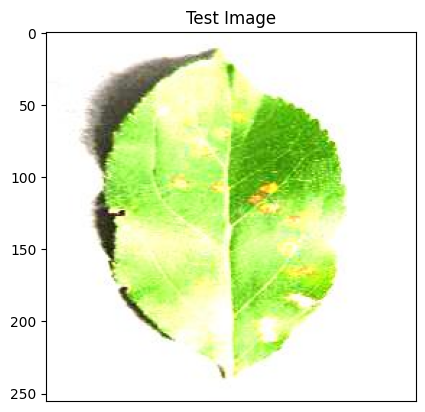

In [4]:
import cv2
import os
image_path = "C:\\Users\\Admin\\Desktop\\plant_disease_detection\\test\\AppleCedarRust1.JPG" 
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
#plt.ysticks([])
plt.show()

### Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size = (128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [6]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 1s 1s/step


(array([[2.2247702e-11, 3.2979949e-12, 9.9986219e-01, 6.3358073e-12,
         3.2900269e-09, 9.3682691e-05, 2.5039514e-13, 2.7809322e-12,
         3.2021735e-14, 1.5685109e-14, 1.2706508e-13, 9.8573398e-09,
         6.8354285e-14, 1.6326196e-12, 5.6146252e-09, 3.5872947e-08,
         3.8138801e-08, 4.8269163e-13, 5.3589511e-10, 1.3034609e-09,
         1.6375377e-12, 9.3540875e-10, 9.3405804e-12, 4.4369557e-08,
         3.0190306e-12, 6.6318444e-12, 7.1433262e-11, 6.3513134e-10,
         1.7474902e-09, 1.2072192e-06, 4.0253844e-06, 6.8469513e-10,
         1.5344689e-07, 2.3395387e-12, 4.7878184e-13, 3.8484937e-05,
         3.3205000e-10, 3.5910555e-14]], dtype=float32),
 (1, 38))

In [7]:
result_index = np.argmax(prediction)
result_index

2

In [9]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']


### Displaying Result of disease prediction

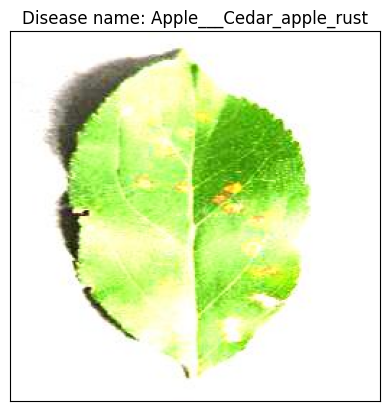

In [10]:

model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
model_prediction

'Apple___Cedar_apple_rust'